In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import timeit

In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_labels = pd.read_csv('train_labels.csv')

In [4]:
train_data.describe()

,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,...,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,30.571124,9.199832,178.755026,837.059166,-182.034161,25.936548,25.042892,18.985189,14.883948,15.109637,...,13.975692,21.463356,22.659653,16.672954,14.122260,-1.053665,9.588436,-2.237489,-2.791015,37.720326
std,286.175656,213.070740,43667.290847,57108.922663,21944.043101,711.525120,898.196470,868.779430,532.786491,236.627576,...,269.255977,545.819172,265.218686,503.468371,818.895883,655.356364,204.758153,793.027599,629.205060,768.206519
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.862000,-135.333000,-29259.560000,-38027.475000,-14405.498000,-448.189000,-590.534000,-563.235000,-349.827000,-144.145000,...,-169.789000,-352.960000,-154.630000,-328.286000,-550.677000,-431.826000,-129.134000,-561.480000,-424.420000,-462.913000
50%,35.463000,2.744000,1208.590000,1037.514000,-147.659000,14.138000,13.895000,16.537000,9.733000,11.226000,...,18.700000,38.426000,26.220000,14.567000,1.836000,-3.789000,8.363000,-4.317000,-7.446000,27.562000
75%,215.740000,156.269000,29640.573000,40569.974000,14526.865000,507.316000,631.339000,608.810000,383.490000,179.828000,...,196.115000,396.910000,198.267000,356.267000,574.552000,425.535000,149.917000,538.809000,427.864000,552.124000
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [5]:
test_data.describe()

,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,6.754328,24.169314,763.900929,-862.792983,497.393799,-6.102086,-7.409699,18.980438,45.420400,5.552209,...,11.519991,33.253244,14.966339,1.432751,0.844958,27.862334,17.626726,-5.891430,1.906880,18.218705
std,279.934939,208.562307,43699.459291,57109.629071,21893.275158,713.120568,919.787042,878.582342,523.032626,228.926425,...,269.425145,545.424424,279.114130,484.239035,812.309438,668.289023,205.320833,795.662116,618.103829,778.003092
min,-1105.426000,-649.565000,-155113.836000,-184240.160000,-91291.593000,-2035.416000,-2908.191000,-2716.201000,-1637.602000,-841.328000,...,-754.360000,-2337.359000,-843.832000,-1660.371000,-3048.856000,-1897.451000,-656.654000,-2452.794000,-2080.857000,-2991.225000
25%,-176.920000,-116.749000,-27479.032000,-40655.944000,-13717.014000,-520.619000,-629.089000,-561.472000,-343.616000,-154.511000,...,-178.660000,-326.508000,-177.331000,-334.751000,-533.876000,-395.476000,-128.067000,-539.820000,-416.491000,-510.300000
50%,12.127000,20.317000,-391.499000,-393.780000,766.785000,-9.537000,40.638000,7.819000,42.789000,13.923000,...,13.026000,14.850000,19.705000,3.010000,-9.236000,26.576000,25.438000,11.396000,-1.849000,27.904000
75%,185.301000,171.577000,31332.410000,36306.490000,14653.756000,490.640000,625.637000,613.666000,406.906000,161.232000,...,200.582000,381.102000,205.328000,335.239000,573.305000,466.003000,157.342000,547.497000,422.485000,556.566000
max,1053.495000,736.906000,141244.534000,177561.749000,60844.690000,2397.488000,2987.201000,2916.440000,1765.077000,684.350000,...,1093.874000,2010.261000,914.288000,1647.605000,2444.526000,2412.412000,610.140000,2354.781000,1989.205000,2157.461000


In [6]:
train_labels.value_counts()

1 
 1    3374
-1     375
dtype: int64

In [7]:
print('Shape of training data is {}'.format(train_data.shape))
train_data.head()

Shape of training data is (3749, 10000)


,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
0,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
1,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
2,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
3,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391
4,345.239,-190.663,-19609.472,-44312.301,-3143.034,-681.815,-711.535,-1358.550,396.870,-7.566,...,-28.348,227.120,2.236,70.115,312.647,491.650,184.906,-46.391,286.278,53.120


In [8]:
print('Shape of test data is {}'.format(test_data.shape))
test_data.head()

Shape of test data is (1249, 10000)


,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
0,106.673,-63.988,14393.611,-23722.852,-9392.469,449.456,-562.289,-536.924,-1162.814,168.002,...,-390.906,-49.040,94.748,-168.545,612.119,-216.957,-5.355,-315.510,-145.489,-1254.983
1,-4.873,-205.671,-28555.498,7933.658,4245.138,1603.993,-914.152,1449.421,-700.017,460.350,...,-0.575,162.502,178.716,-403.328,504.106,179.730,-186.519,481.705,-404.409,-896.072
2,-190.940,195.398,7372.475,-57092.149,21447.785,508.022,1256.862,1498.347,569.061,16.259,...,19.651,-18.126,104.865,336.881,1799.097,359.658,102.798,242.973,-536.491,316.552
3,-235.533,332.318,47801.547,-48097.081,-8387.428,-1062.866,-511.930,908.649,-424.938,322.100,...,-302.825,-358.884,-94.971,109.459,189.027,-990.600,125.996,-1309.715,-510.876,768.972
4,18.564,-209.380,54745.617,26773.080,-33558.031,-612.828,7.124,791.591,-434.847,167.058,...,-23.183,-751.586,152.258,279.664,-939.900,402.993,51.523,-1476.305,-516.572,80.145


In [9]:
train_data.isnull().sum().sum()

0

In [10]:
test_data.isnull().sum().sum()

0

In [15]:
scaler = StandardScaler()

In [16]:
X_std = scaler.fit_transform(train_data)

In [27]:
pca= PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X_std)
pca.n_components_

3073

38.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


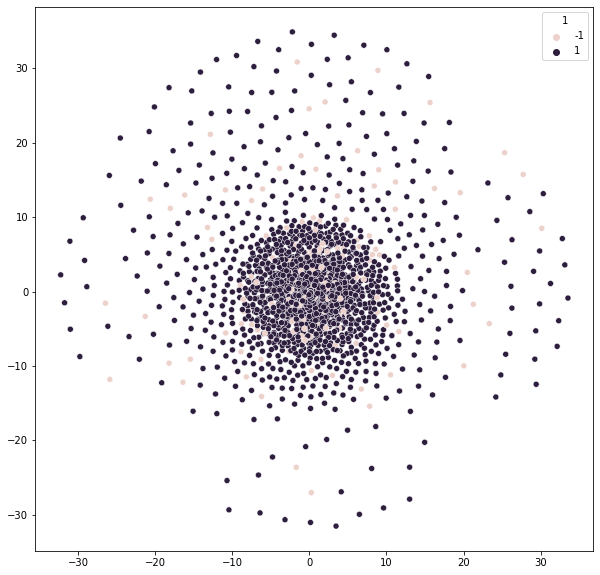

In [109]:
%%timeit -r1 -n1
X_tsne = TSNE(learning_rate=100, perplexity=50).fit_transform(X_std)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                legend=True,
                hue=train_labels['1'])

20.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


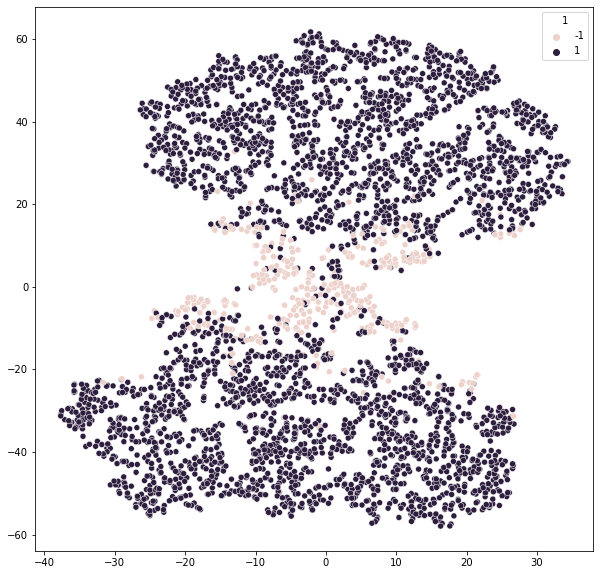

In [108]:
%%timeit -r1 -n1
X_tsne = TSNE(learning_rate=100, perplexity=50).fit_transform(train_data)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                legend=True,
                hue=train_labels['1'])

1min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


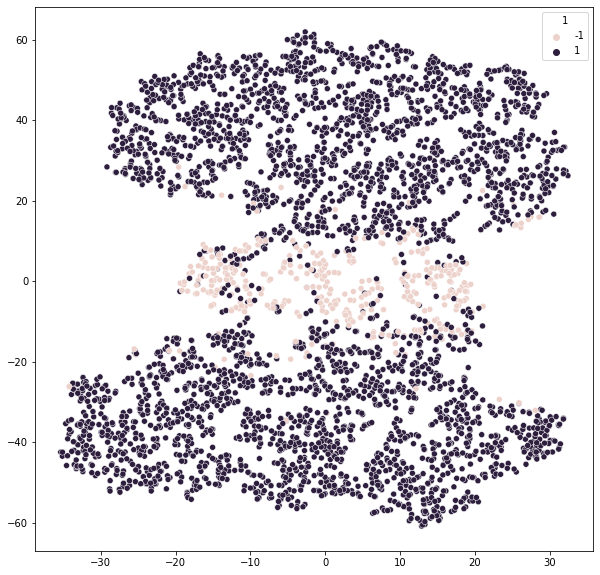

In [110]:
%%timeit -r1 -n1
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
pca_tsne = pca_tsne.fit_transform(train_data)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                legend=True,
                hue=train_labels['1'])

1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


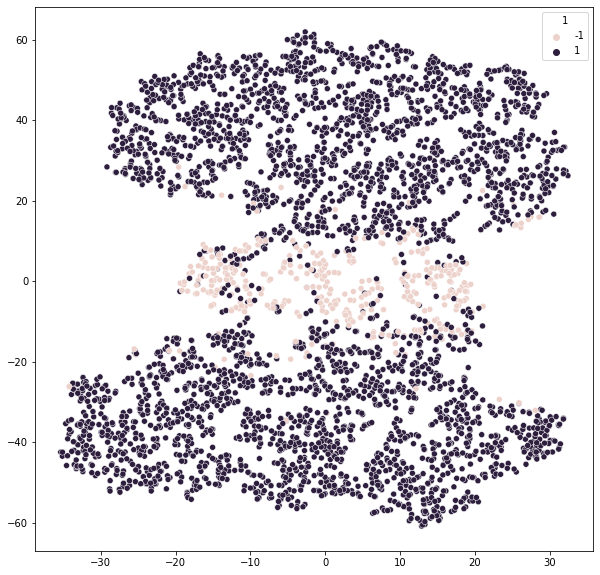

In [111]:
%%timeit -r1 -n1
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
pca_tsne = pca_tsne.fit_transform(X_std)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                legend=True,
                hue=train_labels['1'])